# Principal Component Analysis

El siguiente notebook tiene por objetivo prácticar y ejemplificar el funcionamiento de PCA. Recordemos que se trata de un algortimo de aprendizaje no supervisado que buscar reducir la dimensionalidad (eliminar columnas) evitando la perdida de información. Para ello se utilizan los principios de algebra lineal para la obtención de eigenvalores y eigvectores que consigan una cambio de base lineal ortogonal en que la información pueda quedar descrita en n-1 dimensiones. Para ello se elige el eigenvector con mayor variación y como criterio para realziar o no la eliminación se utiliza $$ \lambda_{1} >> \lambda_{2} $$


Pues $$ \frac{\lambda_{1}}{\lambda_{2} + \lambda_{1}} = 0.5 = 50 \% $$

Implica que la información está igualmente distribuida entre ambos ejes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Importamos un dataset sobre plantas y sus caracteristicas
iris = sm.datasets.get_rdataset("iris", "datasets")
data = iris.data
print('Rows:',data.shape[0],'   Cols:',data.shape[1])
data.head(5)

Rows: 150    Cols: 5


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Separamos target de inputs
x = data.iloc[:,0:-1]
y = data.loc[:,'Species']
total_components = x.shape[1] # Número de columnas

In [12]:
""" Verificamos como es la correlación entre variables """
(data.iloc[:,0:-1]).corr(method='pearson')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


In [6]:
# Hacemos escalamiento estandar (normalización de los datos)
escalar = StandardScaler()
x_scaled = escalar.fit_transform(x)
x_scaled[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [7]:
# Se hace el PCA sobre los inputs normalizados

pca = PCA()
x_projected = pca.fit_transform(x_scaled) #Array
x_projected = pd.DataFrame(x_projected) #Convertimos a DF
x_projected.head(5)

,0,1,2,3
0,-2.264703,0.480027,0.127706,-0.024168
1,-2.080961,-0.674134,0.234609,-0.103007
2,-2.364229,-0.341908,-0.044201,-0.028377
3,-2.299384,-0.597395,-0.091290,0.065956
4,-2.389842,0.646835,-0.015738,0.035923


In [19]:
print("Los eigen valores de nuestra matriz de covarianza son:")

for i in range(0, len(pca.explained_variance_)):
    print(data.columns[i], round(pca.explained_variance_[i],4))

Los eigen valores de nuestra matriz de covarianza son:
Sepal.Length 2.9381
Sepal.Width 0.9202
Petal.Length 0.1477
Petal.Width 0.0209


In [24]:
for i in range(0, len(pca.explained_variance_)):

    print("El porcentaje de variación explicada por componentes principales es:", data.columns[i+1], "is", format(pca.explained_variance_ratio_[i]*100,'.0f'),'%')

El porcentaje de variación explicada por componentes principales es: Sepal.Width is 73 %
El porcentaje de variación explicada por componentes principales es: Petal.Length is 23 %
El porcentaje de variación explicada por componentes principales es: Petal.Width is 4 %
El porcentaje de variación explicada por componentes principales es: Species is 1 %


In [26]:
# Suma acumulativa de la variación
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

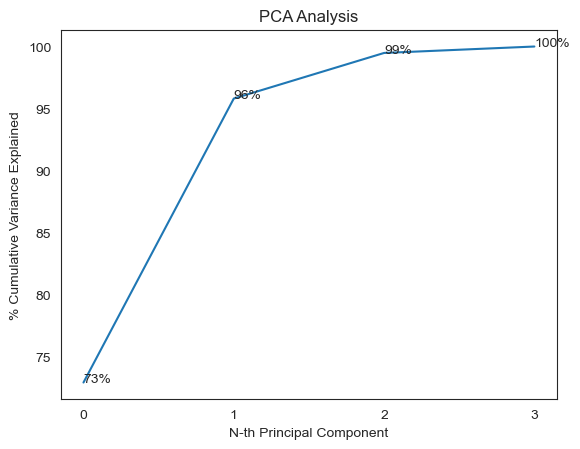

In [11]:
sns.set_style('white')

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')

In [27]:
""" La gráfica anterior muestra el porcentaje acumulado por lo que 1 y 2 captan el 96% de la información"""
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [28]:
# Para saber cuanto influyo cada categoria en la decisión del componente
num_components = 2
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = x.columns, index=['Principal component {}'.format(i) for i in range(1, num_components + 1)])
pc_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Principal component 1,0.521066,0.269347,0.580413,0.564857
Principal component 2,0.377418,0.923296,0.024492,0.066942


/var/folders/v4/2y3d_dfd7hv8b31yqy3186v40000gp/T/ipykernel_17655/2774260703.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pc_df.iloc[0:1],ci=None)


Text(0, 0.5, 'feature importance for PC1')

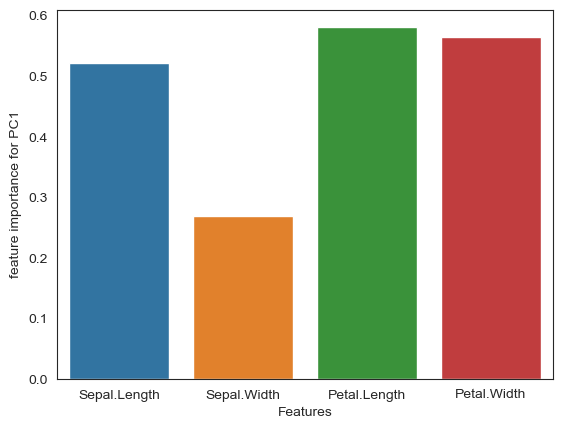

In [14]:
sns.barplot(data=pc_df.iloc[0:1],ci=None)
plt.xlabel('Features')
plt.ylabel('feature importance for PC1')

/var/folders/v4/2y3d_dfd7hv8b31yqy3186v40000gp/T/ipykernel_17655/2339782516.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pc_df.iloc[1:2],ci=None)


Text(0, 0.5, 'feature importance for PC2')

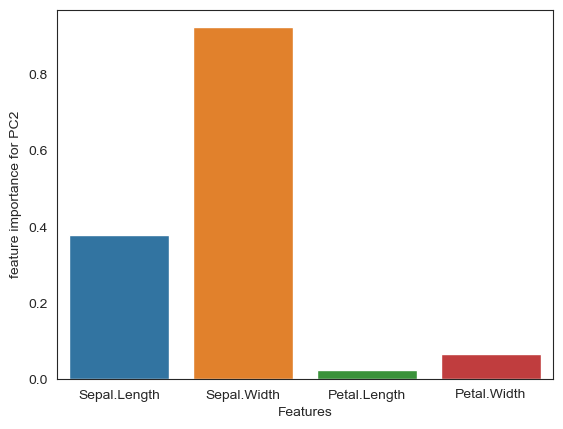

In [15]:
sns.barplot(data=pc_df.iloc[1:2],ci=None)
plt.xlabel('Features')
plt.ylabel('feature importance for PC2')

Lo anterior nos muestra que si bien para el componente 1 las caracteristicas influyen equitativamente, el segundo está muy regido por Sepal.Width

In [16]:
def myplot(score,coeff,labels=None,out=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    sns.scatterplot(x=xs*scalex, y=ys*scaley, hue=out, legend=False)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

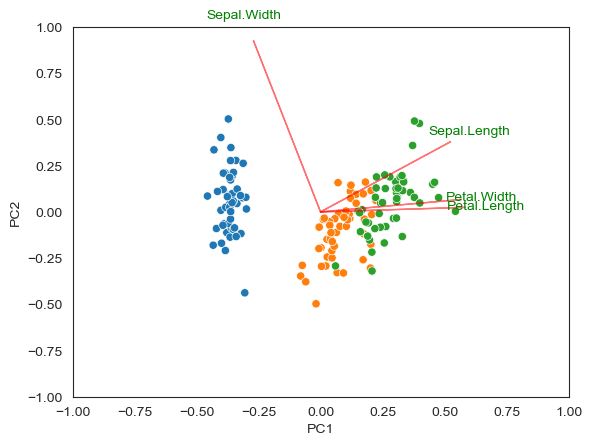

In [17]:
# Call the function. Use only the 2 PCs.
myplot(np.array(x_projected.iloc[:,0:2]),np.transpose(pca.components_[0:2, :]),labels=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], out=y)

Text(0.5, 1.0, 'Before applying PCA')

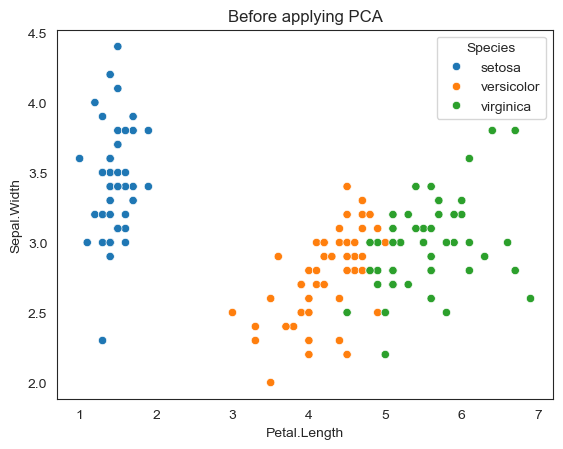

In [18]:
sns.scatterplot(x=data['Petal.Length'],y=data['Sepal.Width'],hue=y)
plt.title('Before applying PCA')

Text(0, 0.5, 'Projected data in PC2')

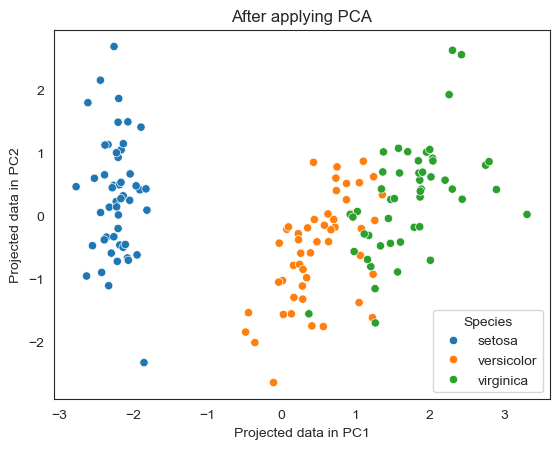

In [19]:
sns.scatterplot(x=x_projected[0],y=x_projected[1],hue=y)
plt.title('After applying PCA')
plt.xlabel('Projected data in PC1')
plt.ylabel('Projected data in PC2')

In [20]:
# As the cumulative percentage variance for principal components 1 and 2 is 96%, only their projections will be used in the new dataset
new_data = x_projected.iloc[:,0:num_components]
# Assign names to projections on components
new_data.columns = ['PC{}'.format(i) for i in range(1, num_components + 1)]
new_data = pd.concat([new_data,y], axis=1)
new_data

,PC1,PC2,Species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


In [21]:
new_data.to_csv('iris_afterPCA.csv')